### Average over multiple runs  - Phase or amplirude noise -  Method 1
Plot the emittance growth in the presence of phase noise - PN. The simulation for each set of parameters is repeated multiple times. The mean and the standard deviation of the emittance values are computed over all runs (part 3) for each turn. The normalised emittance is used here. 

In [1]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
import csv
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Plotting paramerters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [3]:
n_runs = 1 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 

In [4]:
# variable of iteration
#my_variables = np.arange(100, 500, 100000)
my_variables = [100, 500]
print(my_variables)
titleLegend = 'slices'

[100, 500]


In [5]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
#study_name = 'sps_270GeV_noCC_1e5turns_1e5Nb_wakefields_slices_'
study_name = 'spsQ26_270GeV_noCC_1e5turns_5e5Nb_wakefields_slices'
noise_type = 'PN'
#PN_name_template = '{}_myteest'.format(type_of_noise)

In [6]:
ex_dict, ey_dict = {}, {} # type: dictionary
meanX_dict, meanY_dict = {}, {}


for var in my_variables:
    for run in range(n_runs):
        print(var, run)
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{var}_run{run}/file.txt', delimiter = ",", unpack = True)
        # B. Create a different list for each run and save the emittance values
        ex_dict[temp_name] = emitX 
        ey_dict[temp_name] = emitY
        meanX_dict[temp_name] =  meanX 
        meanY_dict[temp_name] = meanY
        
        

100 0
500 0


#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [7]:
ex_mean, ey_mean = {}, {}
ex_std, ey_std = {}, {}

n_saved_turns = int(n_turns/decTurns)

for var in my_variables:
    ex_mean[f'{var}'], ey_mean[f'{var}']  = [], []
    ex_std[f'{var}'], ey_std[f'{var}'] = [], []
  
    for turn in range(n_saved_turns):
        ex_temp = []
        ey_temp = []

        # keep all the emittance values for all the runs
        for run in range(n_runs):
            #temp_name = 'run{}'.format(run+1)
            temp_name = f'{var}_run{run}' 
            ex_temp.append(ex_dict[temp_name][turn])
            ey_temp.append(ey_dict[temp_name][turn])
        # calculate and append the mean of the emittance value for every turn
        ex_mean[f'{var}'].append(np.mean(ex_temp))
        ey_mean[f'{var}'].append(np.mean(ey_temp))
        # calculate and append the standard deviation of the emittance value for every turn
        ex_std[f'{var}'].append(np.std(ex_temp))
        ey_std[f'{var}'].append(np.std(ey_temp))    

#### 3) Convert turns to time [s]

In [8]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

#### 4) Plot evolution of the normalised vertical emittance for all study cases

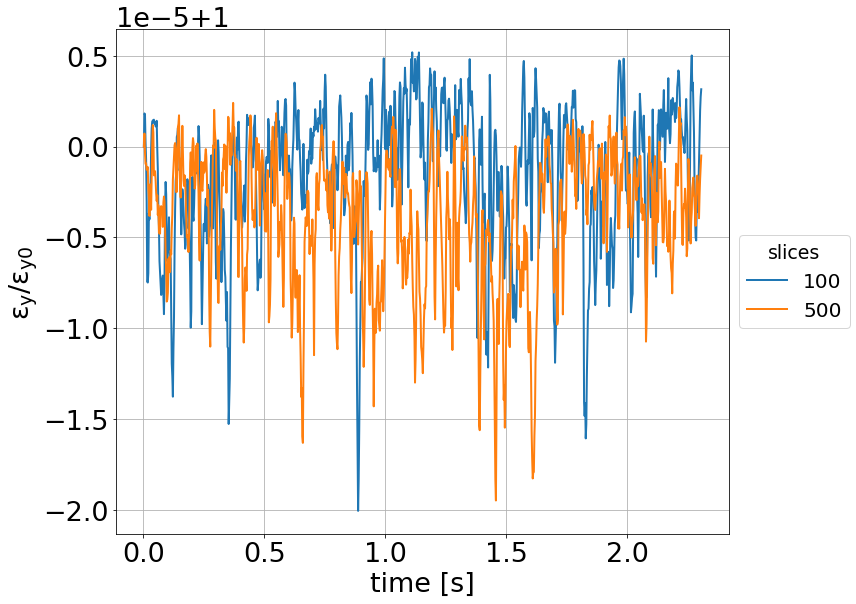

In [9]:
fig = plt.figure(figsize=(12, 8.5))
for var in my_variables:
    plt.plot(tspan, np.array(ey_mean[f'{var}'])/np.array(ey_mean[f'{var}'][0]), label=f'{var}')    
      
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\mathrm{\epsilon_y / \epsilon_{y0}}$')

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)



plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/dey_{study_name}_{noise_type}_runs{n_runs}_iterateSlices.png', bbox_inches='tight')

### 6) Plot evolution of the normalised horizontal emittance

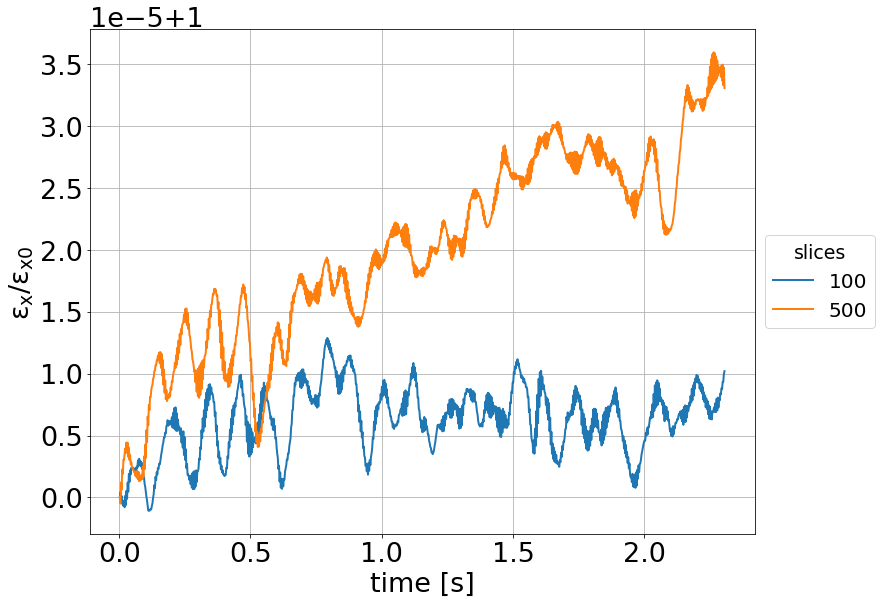

In [10]:
fig = plt.figure(figsize=(12, 8.5))
for var in my_variables:
    plt.plot(tspan, np.array(ex_mean[f'{var}'])/np.array(ex_mean[f'{var}'][0]), label=f'{var}')    
      
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\mathrm{\epsilon_x / \epsilon_{x0}}$')

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)


plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig(f'./output/dex_{study_name}_{noise_type}_runs{n_runs}_iterateSlices.png', bbox_inches='tight')

### 8)  Evolution of the centroid - vertical plane

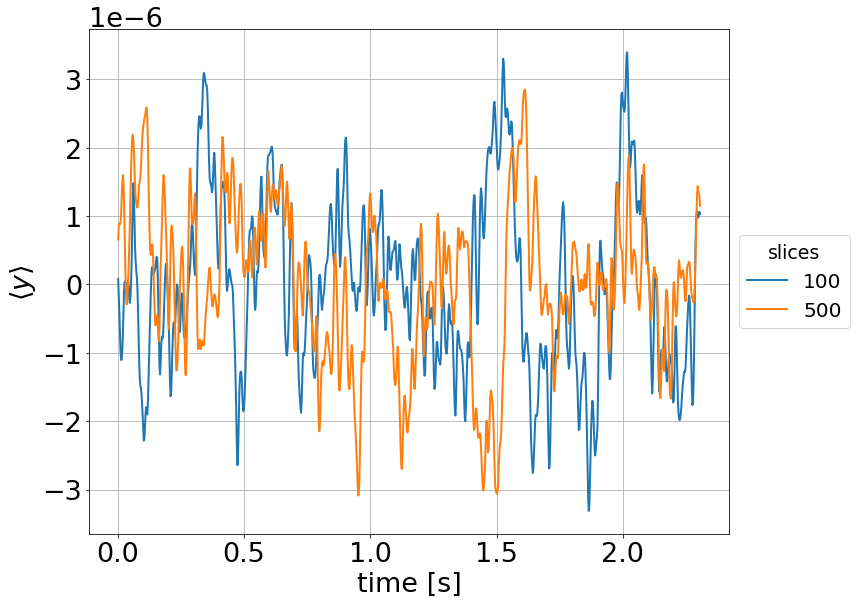

In [11]:
fig = plt.figure(figsize=(12, 8.5))
for var in my_variables:
    for run in range(n_runs):
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        plt.plot(tspan, np.array(meanY_dict[temp_name]), label=f'{var}')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\langle y \rangle$')

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/meanY_{study_name}_{noise_type}_runs{n_runs}_iterate{titleLegend}.png')

### 9) Evolution of the centroid - horizontal plane

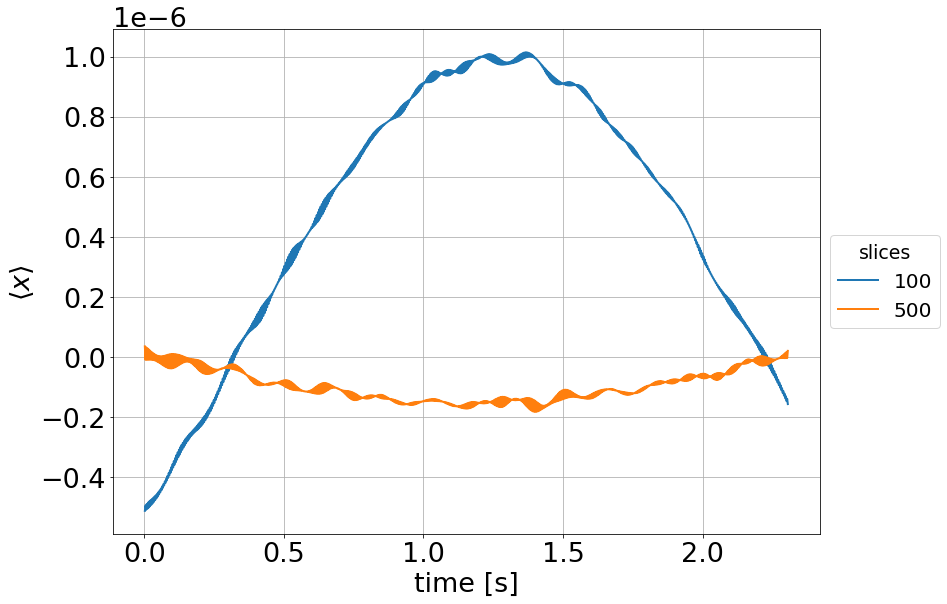

In [12]:
fig = plt.figure(figsize=(13.5, 8.5))
for var in my_variables:
    for run in range(n_runs):
        temp_name = f'{var}_run{run}' # the suffix of the name of the current study
        # A. load the turn by turn data in a dictionary
        plt.plot(tspan, np.array(meanX_dict[temp_name]), label=f'{var}')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('time [s]')
plt.ylabel(r'$\langle x \rangle$')

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=titleLegend, title_fontsize=19)

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/meanX_{study_name}_{noise_type}_runs{n_runs}_iterate{titleLegend}.png')

#### 10) Calculate the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only

In [16]:
# linear fit
var = 500
[m_pn, b_pn], cov_pn = np.polyfit(tspan, ex_mean[f'{var}'], 1, cov=True)
# compute the error of the gradient of the fit slope
err_pn = np.sqrt(np.diag(cov_pn))

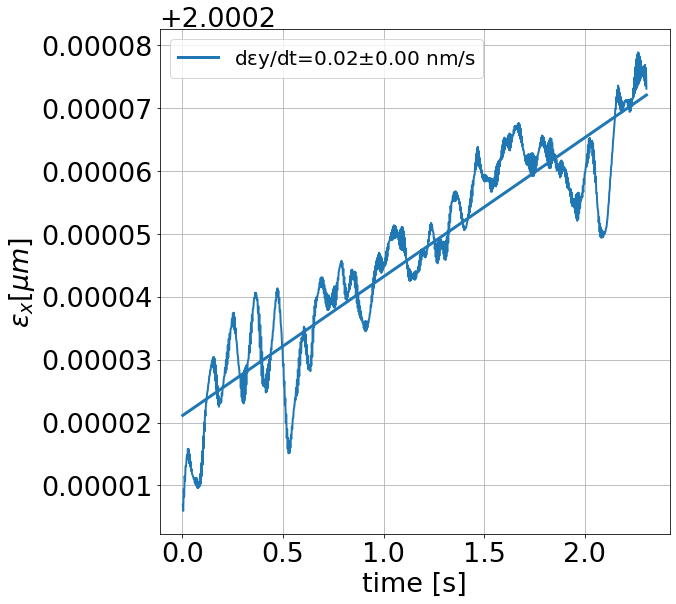

In [19]:
plt.plot(tspan, np.array(ex_mean[f'{var}'])*1e6, c='C0')
plt.plot(tspan, (m_pn*tspan+b_pn)*1e6, c = 'C0', label=r'$\mathrm{d\epsilon y/dt}$'+'={0:.2f}'.format(m_pn*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_pn[0]*1e9), linewidth = 3)

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_x [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'./output/dex_{study_name}_{noise_type}_runs{n_runs}_iterate{titleLegend}.png')